In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
data = pd.read_csv("online_shoppers_intention.csv")

In [3]:
data.dtypes


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [4]:
print(data['Month'].value_counts())
print(data['VisitorType'].value_counts())

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


In [5]:
column_trans = make_column_transformer((OneHotEncoder(),['Month','OperatingSystems','Browser','VisitorType','Weekend']),remainder='passthrough')

# Scaler
scalar = MinMaxScaler()

# Purchased
dataset_p = data[data.Revenue==True]
# Not Purchased
dataset_np = data[data.Revenue==False]

# Downsampled Dataset
dataset_p_down = resample(dataset_p,replace=False,n_samples=1000)
dataset_np_down = resample(dataset_np,replace=False,n_samples=5000)
dataset = pd.concat([dataset_p_down,dataset_np_down])

# Identifying the class label
X = dataset.drop(columns=['Revenue'])
y = dataset['Revenue']

# Encoding categorical features
column_trans.fit(X)
X = column_trans.transform(X)

# Creating training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# Center and normalize the data
scalar.fit(X)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

[1908, 10422]


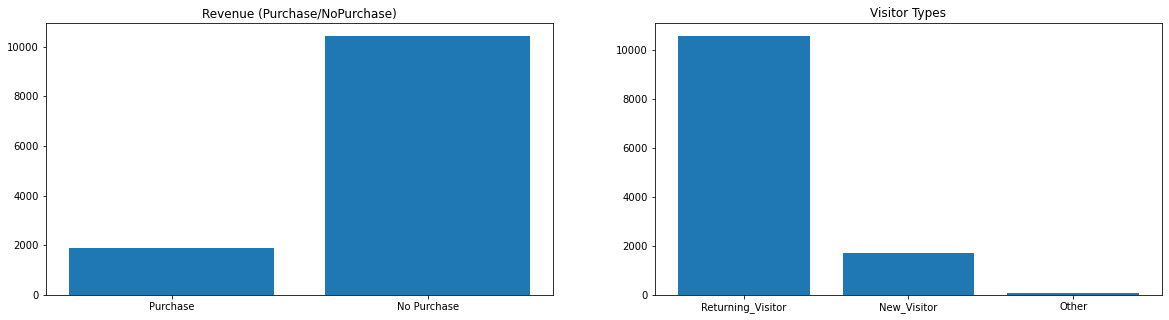

In [6]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(20,5)

#Visitor Types
axs[1].set_title("Visitor Types")
Vtype = ['Returning_Visitor','New_Visitor','Other']
count_vtype = [data['VisitorType'].value_counts()['Returning_Visitor'],
               data['VisitorType'].value_counts()['New_Visitor'],
               data['VisitorType'].value_counts()['Other']]
axs[1].bar(Vtype,count_vtype)

#Number of Purchased
axs[0].set_title("Revenue (Purchase/NoPurchase)")
TF = ["Purchase","No Purchase"]
TF_count = [data['Revenue'].value_counts()[True],data['Revenue'].value_counts()[False]]
axs[0].bar(TF,TF_count)

print(TF_count)
plt.show()

C:\Users\RTECH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Purchase each month')

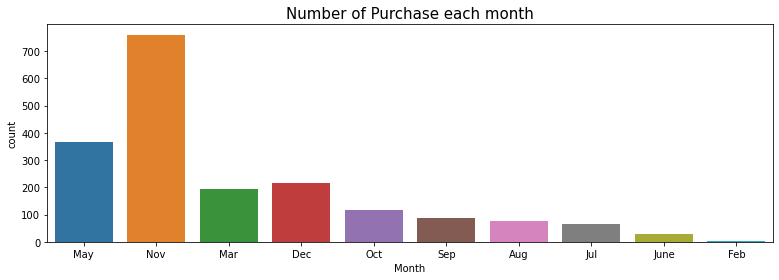

In [7]:
plt.figure(figsize=(13, 4))
sns.countplot(dataset_p.Month.dropna(), order = data.Month.value_counts().index);
plt.title('Number of Purchase each month', fontsize = 15)

C:\Users\RTECH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of No Purchase each month')

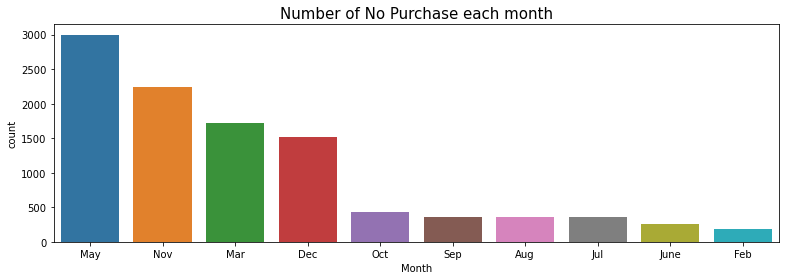

In [8]:
plt.figure(figsize=(13, 4))
sns.countplot(dataset_np.Month.dropna(), order = data.Month.value_counts().index);
plt.title('Number of No Purchase each month', fontsize = 15)

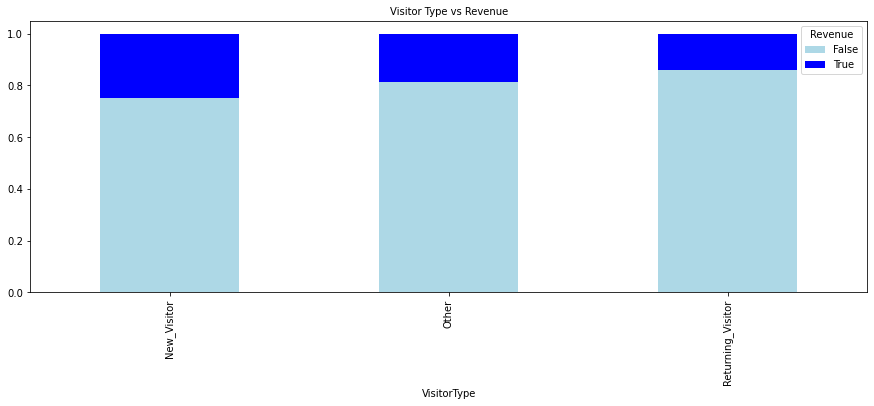

In [9]:
df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Visitor Type vs Revenue', fontsize = 10)
plt.show()

Training Accuracy : 1.0
Testing Accuracy : 0.8908333333333334
[[950  35]
 [ 96 119]]
              precision    recall  f1-score   support

       False       0.91      0.96      0.94       985
        True       0.77      0.55      0.64       215

    accuracy                           0.89      1200
   macro avg       0.84      0.76      0.79      1200
weighted avg       0.88      0.89      0.88      1200



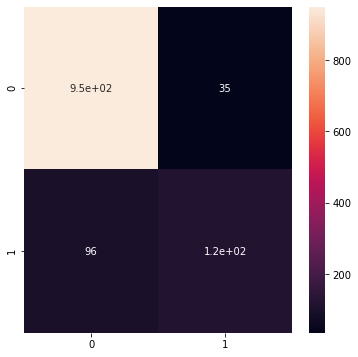

In [29]:
# MODELLING

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluating the model
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
#plt.rcParams['figure.figsize'] = (6, 6)
print(cm)
sns.heatmap(cm ,annot = True)
# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8541666666666666
[[907  78]
 [ 97 118]]
              precision    recall  f1-score   support

       False       0.90      0.92      0.91       985
        True       0.60      0.55      0.57       215

    accuracy                           0.85      1200
   macro avg       0.75      0.73      0.74      1200
weighted avg       0.85      0.85      0.85      1200



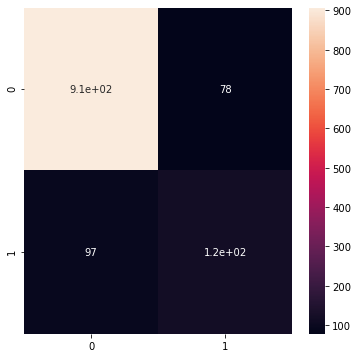

In [30]:
# MODELLING

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluating the model
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
#plt.rcParams['figure.figsize'] = (6, 6)
print(cm)
sns.heatmap(cm ,annot = True)


# classification report
cr = classification_report(y_test, y_pred)
print(cr)

C:\Users\RTECH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy : 0.8697916666666666
Testing Accuracy : 0.8641666666666666
[[965  20]
 [143  72]]
              precision    recall  f1-score   support

       False       0.87      0.98      0.92       985
        True       0.78      0.33      0.47       215

    accuracy                           0.86      1200
   macro avg       0.83      0.66      0.70      1200
weighted avg       0.86      0.86      0.84      1200



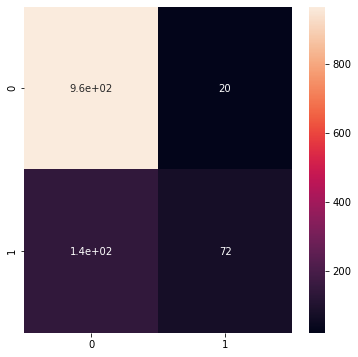

In [25]:
# MODELLING

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

# evaluating the model
print("Training Accuracy :", model1.score(X_train, y_train))
print("Testing Accuracy :", model1.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
#plt.rcParams['figure.figsize'] = (6, 6)
print(cm)
sns.heatmap(cm ,annot = True)
# classification report
cr = classification_report(y_test, y_pred)
print(cr)